Please follow the below steps to complete the project ( 60 points) 
 
1. Read the dataset and understand the features and target variable. 4 points
2. Encode independent features. 4 points 
3. Separate the dependant variable from the rest of the train data 2 point 
4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points 
5. Apply PCA on the independent features of train data. 2 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points 
7. Transform the data using PCA ( select optimum number of PCs). 4 points 
8. Apply KMeans algorithm on the above transformed data. 6 points 
9. Select optimal number of clusters and form clusters out of the train data. 10 points 
10. Create a new column in the train data and populate it with the cluster labels. 4 points 
11. Transform the test data using the same PCA object that was fit on the train data. 4 points 
12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points 
13. Apply SVC model on train dataset and predict target for test dataset. 6 points 
14. Check accuracy and confusion matrix. 2 point 

Problem Statement - Qualitative Bankruptcy - Problem_Description.pdf
Data Set - drive-download-20191118T133407Z-001 (1).zip

In [48]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [6]:
#Read the dataset and understand the features and target variable
data = pd.read_csv('Qualitative_Bankruptcy.data.txt', sep=",", header=None)
data.columns = ["Industrial Risk", "Management Risk", "Financial Flexibility", "Credibility", "Competitiveness", "Operating Risk", "Class"]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [8]:
data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [9]:
data.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

In [10]:
data.describe().transpose()

,count,unique,top,freq
Industrial Risk,250,3,N,89
Management Risk,250,3,N,119
Financial Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating Risk,250,3,N,114
Class,250,2,NB,143


In [12]:
data.groupby(["Class"]).count()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Class,,,,,,
B,107,107,107,107,107,107
NB,143,143,143,143,143,143


In [60]:
#Separate target and independent features
data_X = data.drop('Class', axis=1)
data_y = data['Class']

In [61]:
data_y.head()

0    NB
1    NB
2    NB
3    NB
4    NB
Name: Class, dtype: object

In [106]:
#Encode
le = LabelEncoder()
data_X = data_X.apply(lambda col: le.fit_transform(col))
data_X.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [64]:
#OneHotEncoding
enc = OneHotEncoder()
features = enc.fit_transform(data_X).toarray()

C:\Users\Nivedita\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [65]:
features

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

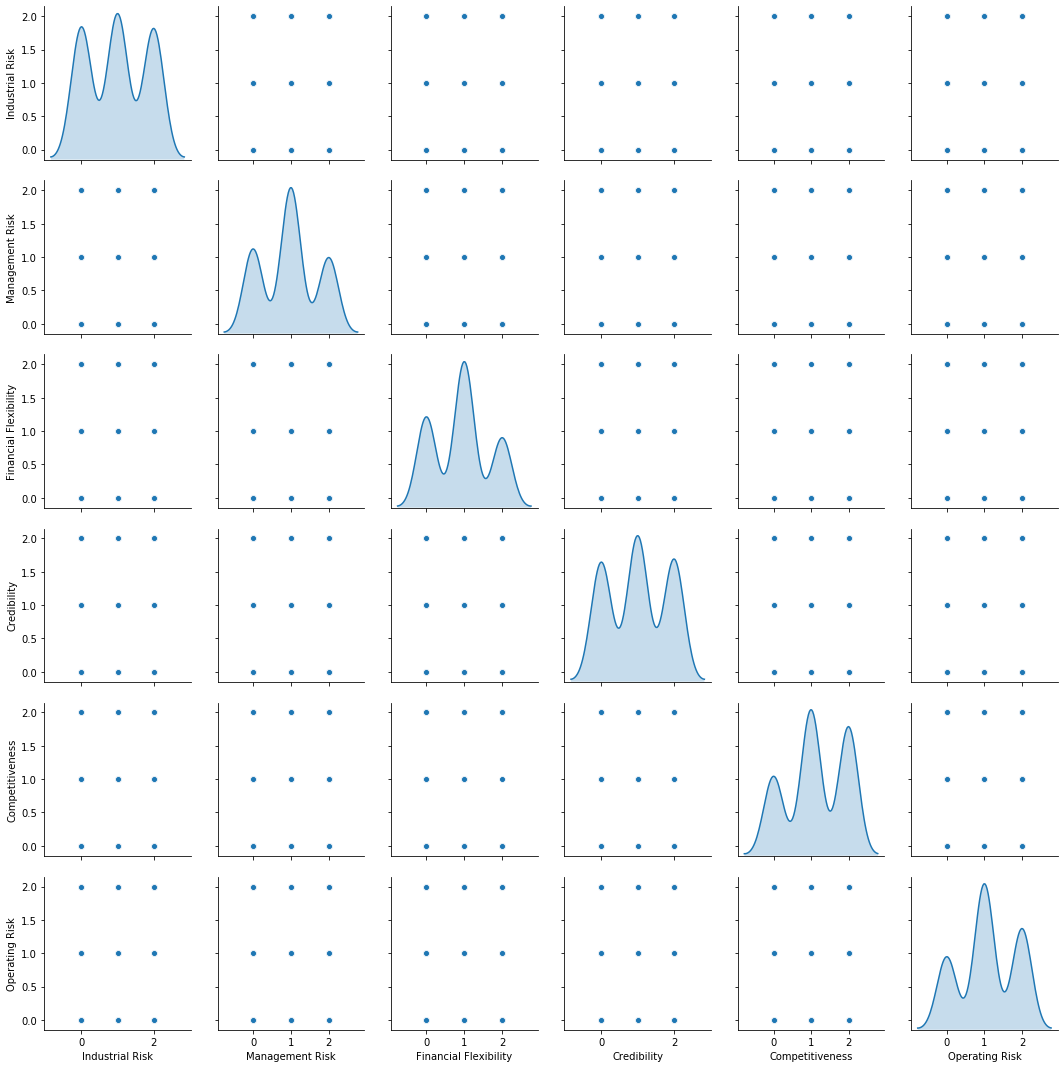

In [37]:
#Pairplot
sns.pairplot(data, diag_kind = 'kde')

In [66]:
# Split the data set into training and test set in the ratio of 80:20
X = features
y = data_y

In [67]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=1)

In [72]:
#Apply PCA to train data.
pca=PCA()
pcaXtrain=pca.fit_transform(X_train)
pcaXtest=pca.transform(X_test)

In [73]:
print(pca.components_.shape) 

(18, 18)


In [74]:
print(X_train.shape, X_test.shape)

(200, 18) (50, 18)


Observation : As we can see above :There are as many PCA components as original dimensions.

In [75]:
var_explained = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_explained)

In [78]:
cum_var_exp

array([0.26482201, 0.38510227, 0.48771405, 0.58320357, 0.66963409,
       0.74658908, 0.81226686, 0.86746903, 0.91844727, 0.96113548,
       0.98683441, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

Observation : As we see above , 10 features out of 18 covers more than 95% variance.
Hence,data set should be transformed according to these 10 new dimentions.

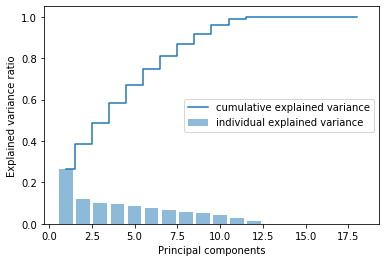

In [77]:
#Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance)
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [80]:
#Transform the data using PCA ( select optimum number of PCs)
pca = PCA(n_components = 10)
pcaXtrain_final = pca.fit_transform(X_train)
pcaXtrain_final.shape

(200, 10)

In [81]:
pca.explained_variance_ratio_

array([0.26482201, 0.12028026, 0.10261178, 0.09548952, 0.08643052,
       0.07695499, 0.06567779, 0.05520217, 0.05097824, 0.0426882 ])

In [83]:
var_explained = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_explained)
cum_var_exp

array([0.26482201, 0.38510227, 0.48771405, 0.58320357, 0.66963409,
       0.74658908, 0.81226686, 0.86746903, 0.91844727, 0.96113548])

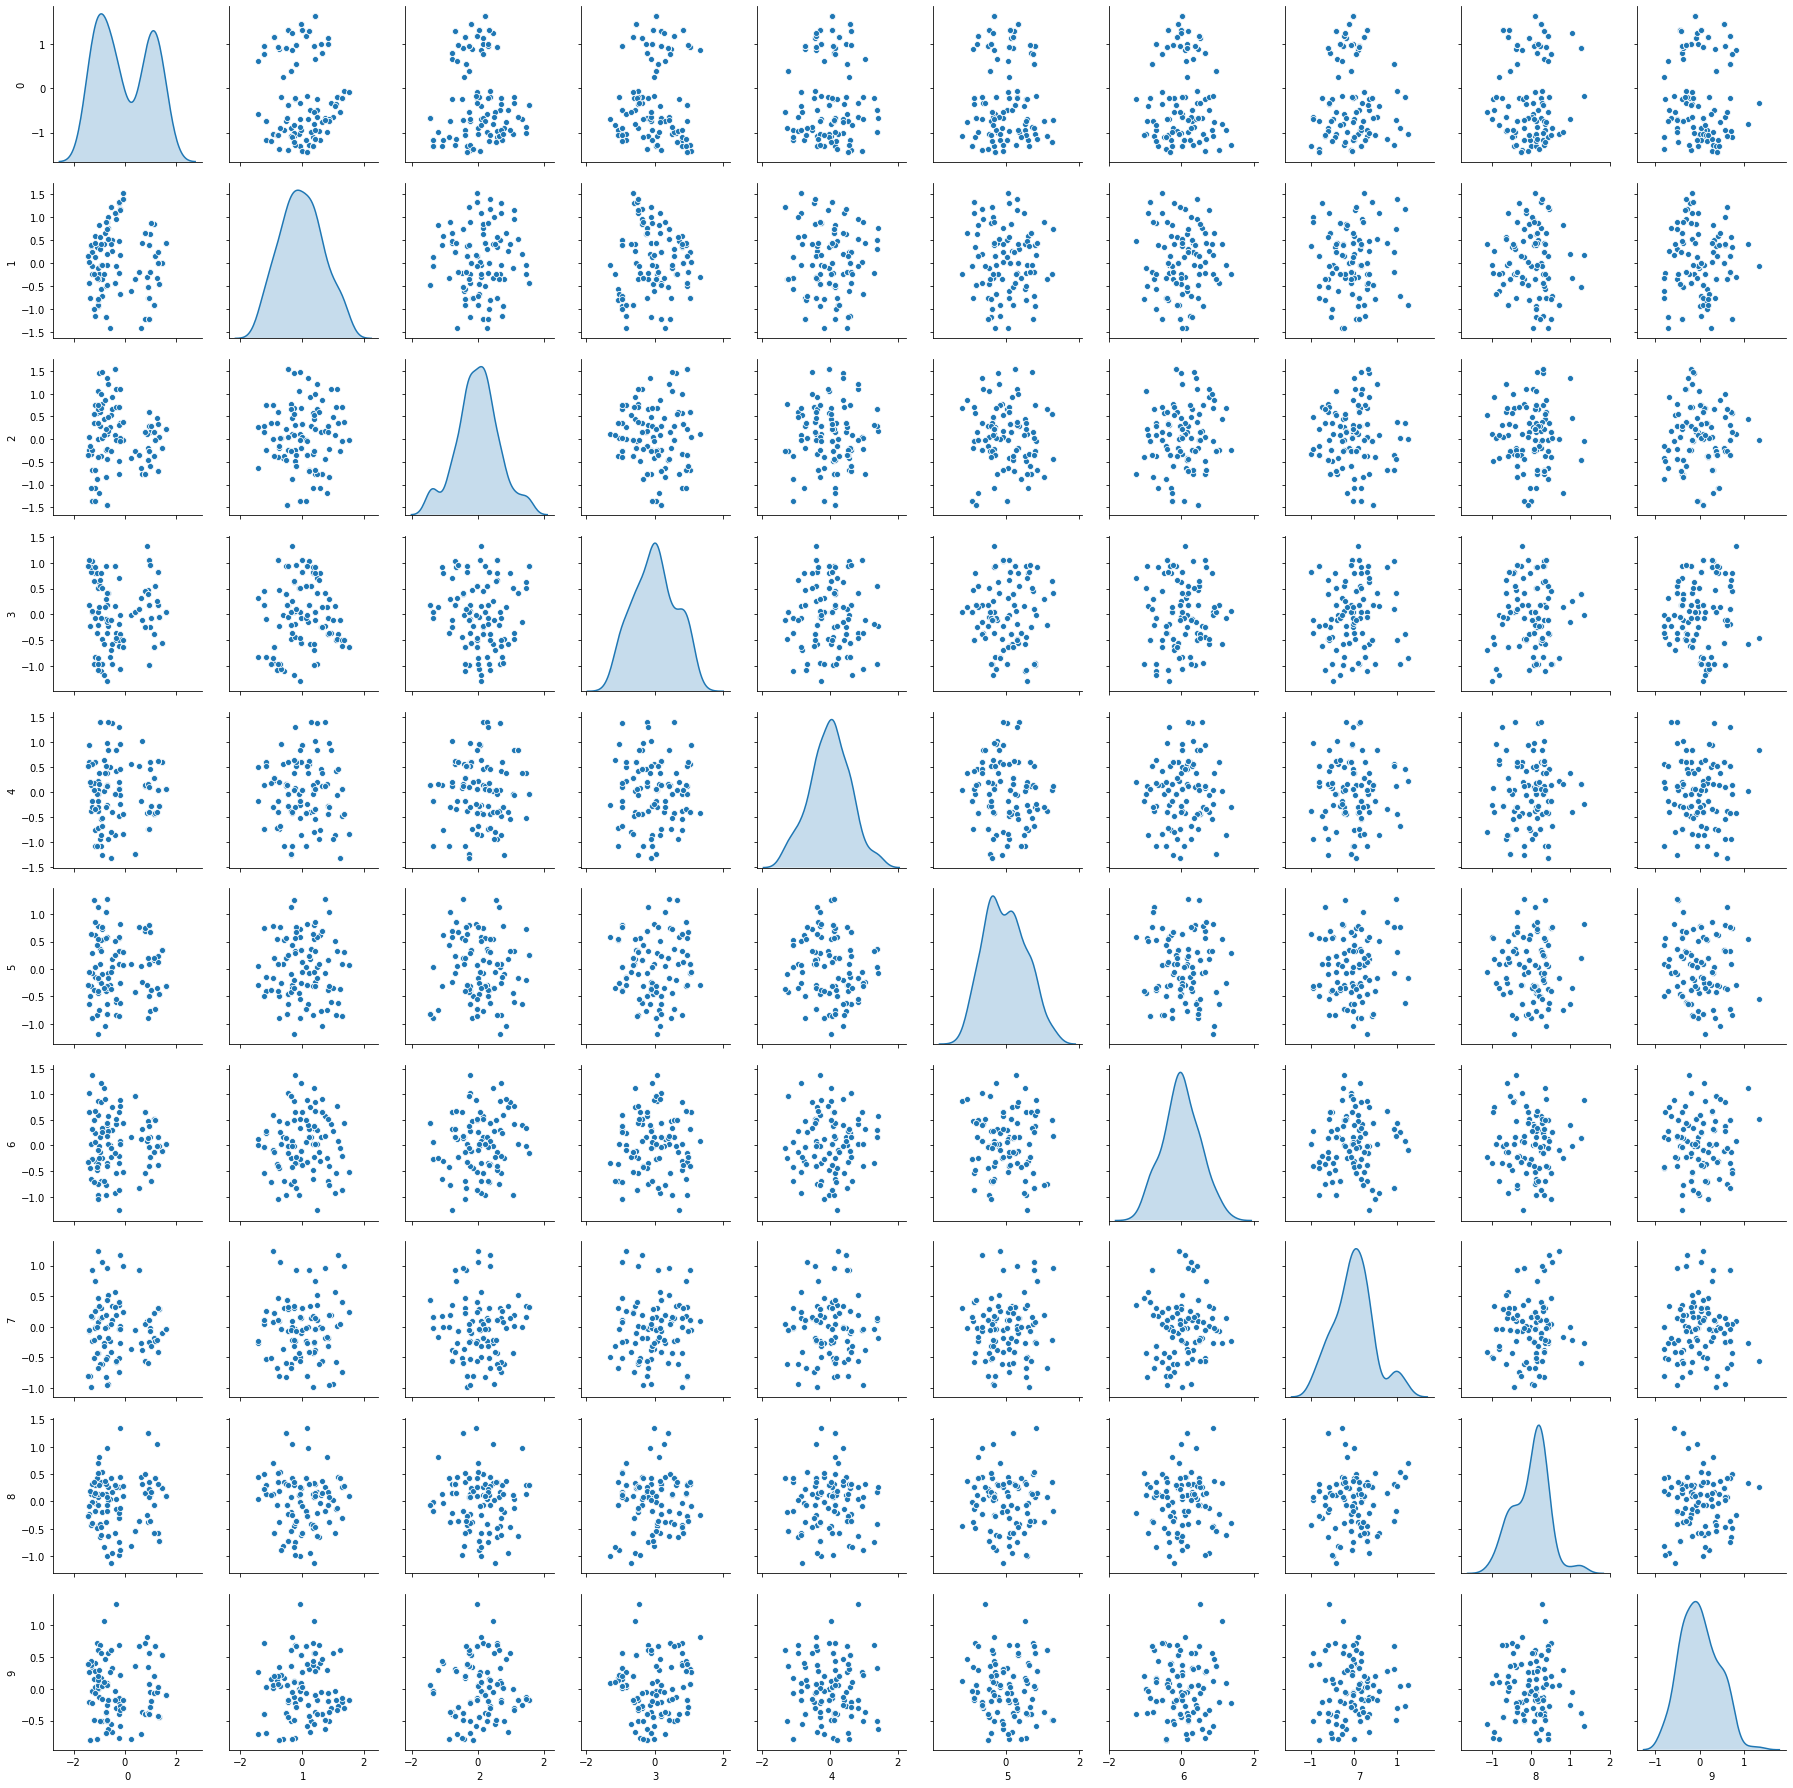

In [85]:
#Pairplot of PCA treated training data.
df = pd.DataFrame(pcaXtrain_final)
sns.pairplot(df, diag_kind = 'kde')

Observation : We see mostly the dimensions are independent which is as expected.

In [86]:
#Apply KMeans algorithm on the above transformed data
from sklearn.cluster import KMeans

In [88]:
cluster_error = []
cluster_range = range(1,11)
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,748.772593
1,2,565.458481
2,3,505.649574
3,4,460.579420
4,5,425.671895
5,6,397.211732
6,7,369.685025
7,8,356.236631
8,9,336.526896
9,10,318.551660


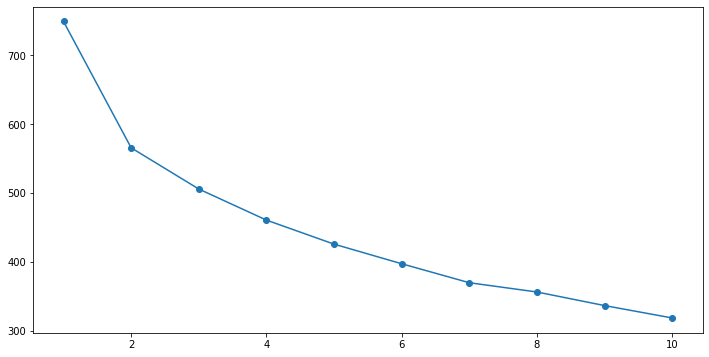

In [89]:
#Select optimal number of clusters and form clusters out of the train data
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [90]:
#Optimal number of clusters = 2
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [92]:
prediction=kmeans.predict(df)
prediction

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1])

In [93]:
prediction.shape

(200,)

In [94]:
#Create a new column in the train data and populate it with the cluster labels
df["Cluster"] = prediction
df

,0,1,2,3,4,5,6,7,8,9,Cluster
0,0.952955,-1.209533,0.293724,0.177867,-0.734001,-0.487100,-0.028271,0.105866,0.222201,-0.390403,0
1,0.252978,-0.616299,-0.408913,-0.020094,0.572699,0.095313,0.160373,-0.362583,-0.813377,-0.798401,0
2,-0.329757,0.949744,1.095126,-0.365714,0.840190,-0.608735,0.424270,0.186925,0.044625,-0.308998,1
3,0.959181,0.390464,-0.267189,-0.971068,0.106228,0.806258,0.384265,-0.255970,0.079529,0.562661,0
4,0.886317,-0.752301,-0.189908,0.462842,-0.740853,-0.883360,0.470692,0.091334,-0.381807,0.335459,0
5,-1.307233,0.359340,-0.334068,0.810835,-0.382085,0.631388,0.028324,-0.983201,-0.436094,0.369136,1
6,-1.286176,0.236316,-0.679362,1.040759,0.564358,-0.077221,0.318338,0.927208,0.320045,0.303719,1
7,-0.980545,0.309748,0.284928,0.548837,1.400492,0.368988,0.175102,0.146650,-0.416567,-0.506296,1
8,-0.221676,1.296408,0.707076,-0.610388,-0.478200,0.083545,-0.195363,-0.742020,-0.308565,-0.207311,1
9,-1.061904,-0.799657,0.356449,-1.072817,-0.714802,0.550811,-0.370027,-0.677289,-0.055695,0.131970,1


In [95]:
#Transform the test data using the same PCA object that was fit on the train data.
pcaXtest_final = pca.transform(X_test)

In [96]:
pcaXtest_final

array([[-0.28280618, -0.31772065,  1.00129814,  0.51300203, -0.61472864,
         0.5708791 ,  0.09839624, -0.31274891, -0.10925493,  0.07392998],
       [ 0.54287013, -0.19261011, -0.34301766,  0.09914053,  0.51480508,
         0.76813907, -0.82441808,  0.93253178, -0.3488148 ,  0.66918932],
       [ 0.88631719, -0.75230069, -0.18990829,  0.46284224, -0.74085252,
        -0.88335969,  0.47069231,  0.09133385, -0.38180652,  0.33545888],
       [ 1.32108607, -0.4552299 ,  0.04103722, -0.04383009, -0.27666508,
        -0.4534792 , -0.00216257,  0.29224009, -0.71546968, -0.43828691],
       [-1.37303787, -0.30148317,  0.14122798,  0.64680609,  0.52946599,
         0.0982521 , -0.81852512, -0.7980049 ,  0.33534755, -0.3306589 ],
       [ 0.94398645, -0.75862639,  0.58990204,  1.0441971 , -0.40718967,
         0.09589607, -0.40616321,  0.11700101,  0.36481192,  0.08090969],
       [-0.33788408, -0.07249135, -0.03008502, -0.4557998 ,  0.83408946,
        -0.54493086,  0.52163408, -0.56529885

In [97]:
df_test = pd.DataFrame(pcaXtest_final)

In [98]:
df_test

,0,1,2,3,4,5,6,7,8,9
0,-0.282806,-0.317721,1.001298,0.513002,-0.614729,0.570879,0.098396,-0.312749,-0.109255,0.073930
1,0.542870,-0.192610,-0.343018,0.099141,0.514805,0.768139,-0.824418,0.932532,-0.348815,0.669189
2,0.886317,-0.752301,-0.189908,0.462842,-0.740853,-0.883360,0.470692,0.091334,-0.381807,0.335459
3,1.321086,-0.455230,0.041037,-0.043830,-0.276665,-0.453479,-0.002163,0.292240,-0.715470,-0.438287
4,-1.373038,-0.301483,0.141228,0.646806,0.529466,0.098252,-0.818525,-0.798005,0.335348,-0.330659
5,0.943986,-0.758626,0.589902,1.044197,-0.407190,0.095896,-0.406163,0.117001,0.364812,0.080910
6,-0.337884,-0.072491,-0.030085,-0.455800,0.834089,-0.544931,0.521634,-0.565299,0.266601,1.329294
7,1.256520,-0.317406,0.473764,0.265733,-0.405477,-0.341123,-0.006859,-0.218461,1.042122,-0.048727
8,1.624651,0.436898,0.221076,0.044036,0.051859,-0.307502,0.019249,-0.032086,0.104451,-0.096611
9,-0.329757,0.949744,1.095126,-0.365714,0.840190,-0.608735,0.424270,0.186925,0.044625,-0.308998


In [99]:
# Use the same kmeans object, assign cluster labels to the test data and store it as a feature.
prediction_test=kmeans.predict(df_test)
prediction_test

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [100]:
prediction_test.shape

(50,)

In [101]:
df_test["Cluster"] = prediction_test
df_test

,0,1,2,3,4,5,6,7,8,9,Cluster
0,-0.282806,-0.317721,1.001298,0.513002,-0.614729,0.570879,0.098396,-0.312749,-0.109255,0.073930,1
1,0.542870,-0.192610,-0.343018,0.099141,0.514805,0.768139,-0.824418,0.932532,-0.348815,0.669189,0
2,0.886317,-0.752301,-0.189908,0.462842,-0.740853,-0.883360,0.470692,0.091334,-0.381807,0.335459,0
3,1.321086,-0.455230,0.041037,-0.043830,-0.276665,-0.453479,-0.002163,0.292240,-0.715470,-0.438287,0
4,-1.373038,-0.301483,0.141228,0.646806,0.529466,0.098252,-0.818525,-0.798005,0.335348,-0.330659,1
5,0.943986,-0.758626,0.589902,1.044197,-0.407190,0.095896,-0.406163,0.117001,0.364812,0.080910,0
6,-0.337884,-0.072491,-0.030085,-0.455800,0.834089,-0.544931,0.521634,-0.565299,0.266601,1.329294,1
7,1.256520,-0.317406,0.473764,0.265733,-0.405477,-0.341123,-0.006859,-0.218461,1.042122,-0.048727,0
8,1.624651,0.436898,0.221076,0.044036,0.051859,-0.307502,0.019249,-0.032086,0.104451,-0.096611,0
9,-0.329757,0.949744,1.095126,-0.365714,0.840190,-0.608735,0.424270,0.186925,0.044625,-0.308998,1


In [102]:
# Apply SVC model on train dataset and predict target for test dataset.
from sklearn import svm
clf = svm.SVC(C=5, gamma=0.001)
clf.fit(df, train_labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
test_prediction = clf.predict(df_test)

In [104]:
# Check accuracy and confusion matrix.
clf.score(df_test,test_labels)

1.0

Accuracy is 100% 

In [105]:
pd.crosstab(test_labels,test_prediction)

col_0,B,NB
Class,,
B,21,0
NB,0,29
